# Problem 1

## Part (a)

Use JuMP to Solve the Portfolio Selection Problem.  This can be found on pages 9 to 11 of Chapter 1 (Revised) of Applied Mathematical Programming. It is available at [this link](https://canvas.mit.edu/files/1970232/download?download_frd=1).

Here are guidelines for solving the problem.
- Your decision variables should be $x[1:5]$ and $y$.
- Use the file Portfolio1.csv, which is provided with this problem set.   You may remove the header row if you wish.
- In Julia,we  create the following two variables.  `Avg_quality` = 1.4;  `Avg_years_to_maturity` = 5.   These variables are not decision variables.  Rather, they will be treated as constants in the JuMP model.   (We will change the values of these three constants in the next part and ask you to resolve the problem.)
- Express the ratio constraints using the above two Julia variables, each of which will be treated by JuMP as a constant.  The denominator of each of the ratio constraints will be $y$.

First, let's import the data into the environment.

In [1]:
## if you have not installed package "CSV", please uncomment the line below and execute it
#using Pkg; Pkg.add("CSV")
using DataFrames, CSV
portfolio = CSV.read("Portfolio1.csv", DataFrame)

Row,Bond name,Bond Type,Moody's rating,Bank's rating,Years to maturity,Yield to maturity %,After tax yield
,String1,String15,String3,Int64,Int64,Float64,Float64
1,A,Municipal,Aa,2,9,4.3,4.3
2,B,Agency,Aa,2,15,5.4,2.7
3,C,Government,Aaa,1,4,5.0,2.5
4,D,Government,Aaa,1,3,4.4,2.2
5,E,Municipal,Ba,5,2,4.5,4.5


Now, please write Julia/JuMP codes in the cell below to describe this problem.

In [2]:
# write Julia/JuMP codes to describe the linear program
using JuMP, Gurobi

# new variables
Avg_quality = 1.4
Avg_years_to_maturity = 5

m = Model(Gurobi.Optimizer)

@variables m begin
    x[1:5] >= 0 # bond to be invested
    y >= 0 # # amount to be borrowed
end

@constraints m begin # Write the constraints below.
    x[1] + x[2] + x[3] + x[4] + x[5] - y <= 10 # cash, have 10mil budget
    y <= 1 # borrowing, can't borrow more than 1 mil
    x[2] + x[3] + x[4] >= 4 # governments, at least 4mil
    ((5 - Avg_quality) * x[5]) + ((1 - Avg_quality) * x[4]) + ((1 - Avg_quality) * x[3]) +  ((2 - Avg_quality) * x[2])+ ((2 - Avg_quality) * x[1]) <= 0 # quality can't exceed average quality 
    ((2 - Avg_years_to_maturity) * x[5]) + ((3 - Avg_years_to_maturity) * x[4]) + ((4 - Avg_years_to_maturity) * x[3]) + ((15 - Avg_years_to_maturity) * x[2]) + ((9 - Avg_years_to_maturity) * x[1])  <= 0# maturity can't exceed 5 years 
end

# Write the objective below.

@objective(m, Max, (0.043 * x[1]) + (0.027 * x[2]) + (0.025 * x[3]) + (0.022 * x[4]) + (0.045 * x[5]) - (0.0275 * y)) #maximizing after tax yield

print(m)
    
    


Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06


Next, you should solve the problem using Gurobi as the solver and print the answer.

In [3]:
#--- Write codes here to query the optimal solutions

optimize!(m)

opt_x = value.(x) # Optimal x values
opt_y = value.(y) # Optimal y
optimal_objective = objective_value(m) # Optimal objective value

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22000.2))

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 5 rows, 6 columns and 20 nonzeros
Model fingerprint: 0x98b8c667
Coefficient statistics:
  Matrix range     [4e-01, 1e+01]
  Objective range  [2e-02, 4e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.06s
Presolved: 4 rows, 6 columns, 19 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1489187e+00   9.429646e+00   0.000000e+00      0s
       2    3.0070000e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.07 seconds (0.00 work units)
Optimal objective  3.007000000e-01

User-callback calls 60, time in user-callback 0.02 sec


0.30069999999999997

In [4]:
println("The objective function value is ", optimal_objective)
println("The optimal decision variable values are ", opt_x, " and ", opt_y)

The objective function value is 0.30069999999999997
The optimal decision variable values are [2.3999999999999995, 0.0, 8.100000000000001, 0.0, 0.4999999999999991] and 1.0


## Part (b)

Solve the problem 10 more times including the following changes in the constants.  

1. `Avg_quality` = 1.1, 1.2, 1.3, 1.4, and 1.5 with all other data being the original data. 
2. `Avg_years_to_maturity` = 3.5, 4.0, 4.5, 5.0 and 5.5, with all other data being the original data.

In the cell below, please write Julia/JuMP codes to solve these problems. You can add more cells below if needed.

In [5]:
# write Julia/JuMP codes here

# new variables
ls_Avg_quality =[ 1.1, 1.2, 1.3, 1.4, 1.5]

opt_obj_quality = []

for a in ls_Avg_quality
    m = Model(Gurobi.Optimizer)
    
    @variables m begin
        x[1:5] >= 0 # bond to be invested
        y >= 0 # # amount to be borrowed
    end
    
    # Complete the constraints and the objective.
    @constraints m begin 
        x[1] + x[2] + x[3] + x[4] + x[5] - y <= 10 # cash, have 10mil budget
        y <= 1 # borrowing, can't borrow more than 1 mil
        x[2] + x[3] + x[4] >= 4 # governments, at least 4mil
        ((5 - a) * x[5]) + ((1 - a) * x[4]) + ((1 - a) * x[3]) +  ((2 - a) * x[2])+ ((2 - a) * x[1]) <= 0 # quality can't exceed average quality 
        ((2 - Avg_years_to_maturity) * x[5]) + ((3 - Avg_years_to_maturity) * x[4]) + ((4 - Avg_years_to_maturity) * x[3]) + ((15 - Avg_years_to_maturity) * x[2]) + ((9 - Avg_years_to_maturity) * x[1])  <= 0# maturity can't exceed 5 years 
    end

    @objective(m, Max, (0.043 * x[1]) + (0.027 * x[2]) + (0.025 * x[3]) + (0.022 * x[4]) + (0.045 * x[5]) - (0.0275 * y))

    optimize!(m)
    
    push!(opt_obj_quality, objective_value(m)) 
end


Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22000.2))

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 5 rows, 6 columns and 20 nonzeros
Model fingerprint: 0x8ab8ed01
Coefficient statistics:
  Matrix range     [1e-01, 1e+01]
  Objective range  [2e-02, 4e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 4 rows, 6 columns, 19 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.2278978e-01   3.617778e+00   0.000000e+00      0s
       1    2.6800000e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.680000000e-01

User-callback calls 60, time

In [7]:
# write Julia/JuMP codes here

# new variables
ls_Avg_years_to_maturity = [3.5, 4.0, 4.5, 5.0, 5.5]

opt_obj_maturity = [] ## initializing vector, no need to write anything here

for b in ls_Avg_years_to_maturity
    m = Model(Gurobi.Optimizer)
    
    @variables m begin
        x[1:5] >= 0 # bond to be invested
        y >= 0 # # amount to be borrowed
    end

    # Complete the constraints and the objective.
    @constraints m begin 
        x[1] + x[2] + x[3] + x[4] + x[5] - y <= 10 # cash, have 10mil budget
        y <= 1 # borrowing, can't borrow more than 1 mil
        x[2] + x[3] + x[4] >= 4 # governments, at least 4mil
        ((5 - Avg_quality) * x[5]) + ((1 - Avg_quality) * x[4]) + ((1 - Avg_quality) * x[3]) +  ((2 - Avg_quality) * x[2])+ ((2 - Avg_quality) * x[1]) <= 0 # quality can't exceed average quality 
        ((2 - b) * x[5]) + ((3 - b) * x[4]) + ((4 - b) * x[3]) + ((15 - b) * x[2]) + ((9 - b) * x[1])  <= 0# maturity can't exceed b years 
    end

    @objective(m, Max, (0.043 * x[1]) + (0.027 * x[2]) + (0.025 * x[3]) + (0.022 * x[4]) + (0.045 * x[5]) - (0.0275 * y))

    optimize!(m)
    
    push!(opt_obj_maturity, objective_value(m)) 
end


Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22000.2))

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 5 rows, 6 columns and 20 nonzeros
Model fingerprint: 0x592c43fa
Coefficient statistics:
  Matrix range     [4e-01, 1e+01]
  Objective range  [2e-02, 4e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 4 rows, 6 columns, 19 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1489187e+00   2.978433e+01   0.000000e+00      0s
       3    2.6100000e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.610000000e-01

User-callback calls 62, time

Graph the optimal solution value as the average quality changes. Please write Julia code in the cell below to make the graph.


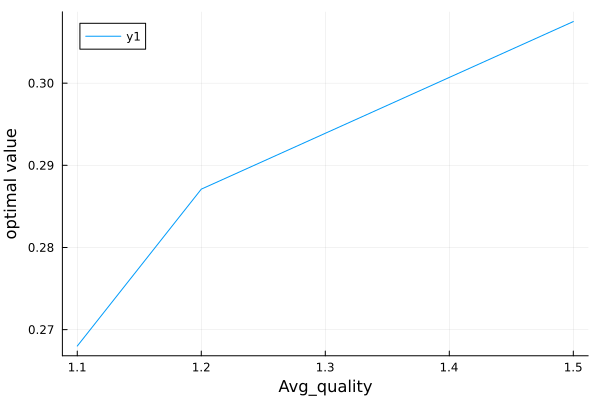

In [10]:
# write Julia/JuMP codes here
# using Pkg; Pkg.add("Plots")
using Plots

plot(ls_Avg_quality, opt_obj_quality, xlabel = "Avg_quality", ylabel = "optimal value")


Graph the optimal solution value as the average years to maturity changes. Please write Julia code in the cell below to make the graph.

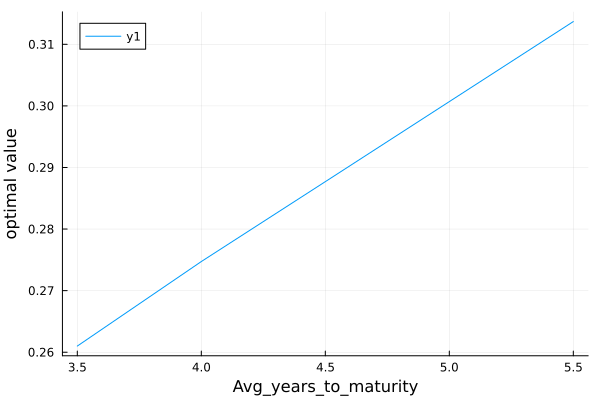

In [11]:
# write Julia/JuMP codes here

plot(ls_Avg_years_to_maturity, opt_obj_maturity, xlabel = "Avg_years_to_maturity", ylabel = "optimal value")


In the PDF writeup, describe: Are the graphs convex?  Are they concave? Is this intuitive to you?  
Briefly explain. (Please use Gurobi as the solver, and use the Plots or StatsPlots packages for graphing.)